In [190]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [191]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithmetic\IPyNb


In [192]:
dfN = pd.read_csv("../Python/Output/NormalLeakage.txt", sep='\t')
dfN.head()

,Samples,Kappa,Count,Mean,Deviation,Range
0,0,1.00,0,0.317311,0.0,1.00
1,0,1.25,0,0.211300,0.0,1.25
2,0,1.50,0,0.133614,0.0,1.50
3,0,1.75,0,0.080118,0.0,1.75
4,0,2.00,0,0.045500,0.0,2.00


<AxesSubplot:title={'center':'Gaussian Distribution'}, xlabel='Measuring Bounding Range $\\kappa_s$', ylabel='Measured Bounding Leakage $\\epsilon(\\kappa_s, N)$'>

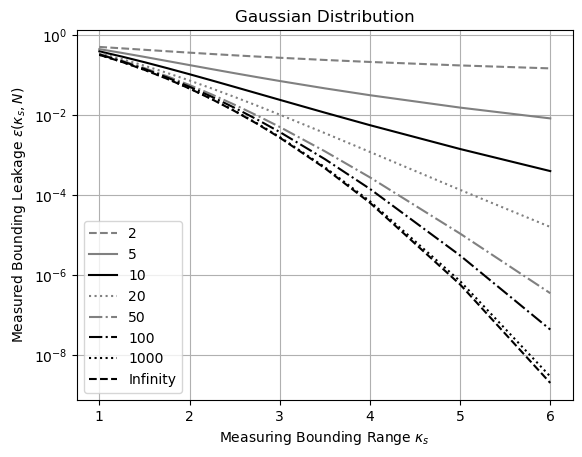

In [193]:
ax = dfN[dfN['Samples'] == 2].plot(x='Kappa', y='Mean', label=2, color='gray', style='--')
dfN[dfN['Samples'] == 5].plot(x='Kappa', y='Mean', label='5', color='gray', style='-', ax=ax)
dfN[dfN['Samples'] == 10].plot(x='Kappa', y='Mean', label='10', color='black', style='-', ax=ax)
dfN[dfN['Samples'] == 20].plot(x='Kappa', y='Mean', label='20', color='gray', style=':', ax=ax)
dfN[dfN['Samples'] == 50].plot(x='Kappa', y='Mean', label='50', color='gray', style='-.', ax=ax)
dfN[dfN['Samples'] == 100].plot(x='Kappa', y='Mean', label='100', color='black', style='-.', ax=ax)
dfN[dfN['Samples'] == 1000].plot(x='Kappa', y='Mean', label='1000', color='black', style=':', ax=ax)
dfN[dfN['Samples'] == 0].plot(x='Kappa', y='Mean', label='Infinity', color='black', style='--', ax=ax, grid=True, logy=True, 
                title='Gaussian Distribution', xlabel=r'Measuring Bounding Range $\kappa_s$', 
                              ylabel=r'Measured Bounding Leakage $\epsilon(\kappa_s, N)$')

<AxesSubplot:title={'center':'Gaussian Distribution'}, xlabel='Measuring Bounding Range  $\\kappa_s$', ylabel='Measured Bounding Range $\\kappa$'>

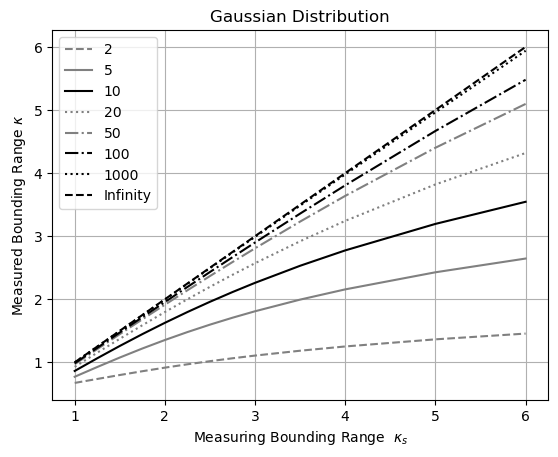

In [194]:
ax = dfN[dfN['Samples'] == 2].plot(x='Kappa', y='Range', label=2, color='gray', style='--')
dfN[dfN['Samples'] == 5].plot(x='Kappa', y='Range', label='5', color='gray', style='-', ax=ax)
dfN[dfN['Samples'] == 10].plot(x='Kappa', y='Range', label='10', color='black', style='-', ax=ax)
dfN[dfN['Samples'] == 20].plot(x='Kappa', y='Range', label='20', color='gray', style=':', ax=ax)
dfN[dfN['Samples'] == 50].plot(x='Kappa', y='Range', label='50', color='gray', style='-.', ax=ax)
dfN[dfN['Samples'] == 100].plot(x='Kappa', y='Range', label='100', color='black', style='-.', ax=ax)
dfN[dfN['Samples'] == 1000].plot(x='Kappa', y='Range', label='1000', color='black', style=':', ax=ax)
dfN[dfN['Samples'] == 0].plot(x='Kappa', y='Range', label='Infinity', color='black', style='--', ax=ax, grid=True, 
                              title='Gaussian Distribution', xlabel=r'Measuring Bounding Range  $\kappa_s$', 
                              ylabel=r'Measured Bounding Range $\kappa$')

In [195]:
dfU = pd.read_csv("../Python/Output/UniformLeakage.txt", sep='\t')
dfU.head()

,Samples,Count,Mean,Deviation
0,2,100000,0.489182,0.318682
1,3,100000,0.330171,0.261936
2,5,100000,0.213984,0.184830
3,10,100000,0.128597,0.114276
4,20,100000,0.081654,0.073818


In [196]:
dfU['Range'] = math.sqrt(3)*(1-dfU['Mean'])

In [333]:
def plotLeakage(sRange:tuple[int]=(None,2,4,5), sLineStyle:tuple[str]=('--',':','-.','-'), 
                log2ndY=True, xlim=(1, 10**5)):
    fig, ax = plt.subplots()
    ax.set_xlabel(r'Sample Count $N$')
    if xlim:
        ax.set_xlim(*xlim)
    ax.set_ylabel(r'Measured Bounding Range $\kappa$')
    ax.set_xscale('log')
    plt.grid(True)

    ax2 = ax.twinx()
    ax2.set_ylabel(r'Bounding Leakage $\epsilon$')
    if log2ndY:
        ax2.set_yscale('log')
    
    for rng,ls in zip(sRange,sLineStyle):
        if rng is None:
            dfPlot = dfU
        else:
            dfPlot = dfN[(dfN['Kappa'] == rng) & (dfN['Samples'] > 0)]
        ax.plot(dfPlot['Samples'], dfPlot['Range'], c='black', ls=ls, 
                label=r'Uniform' if rng is None else f'Normal $\kappa_s$={rng}')
        ax2.plot(dfPlot['Samples'], dfPlot['Mean'], c='gray', ls=ls, 
                label=r'Uniform' if rng is None else f'Normal $\kappa_s$={rng}')
        
    ax.legend(bbox_to_anchor=(1.4, 1.0))
    ax2.legend(bbox_to_anchor=(1.4, 0.3))


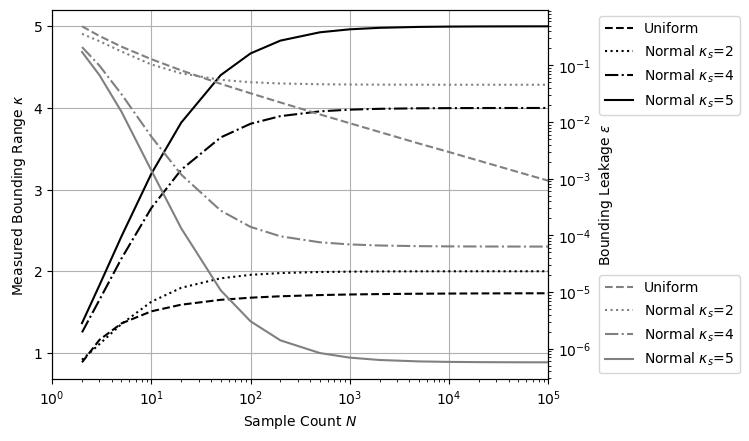

In [334]:
plotLeakage()

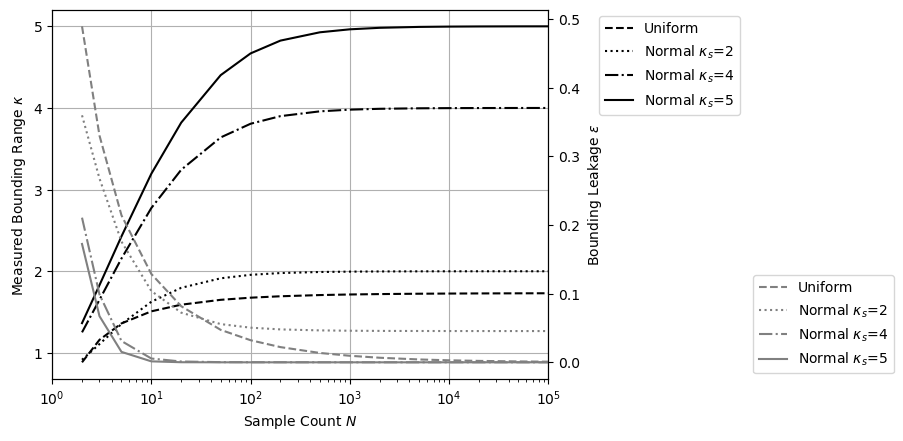

In [335]:
plotLeakage(log2ndY=False)

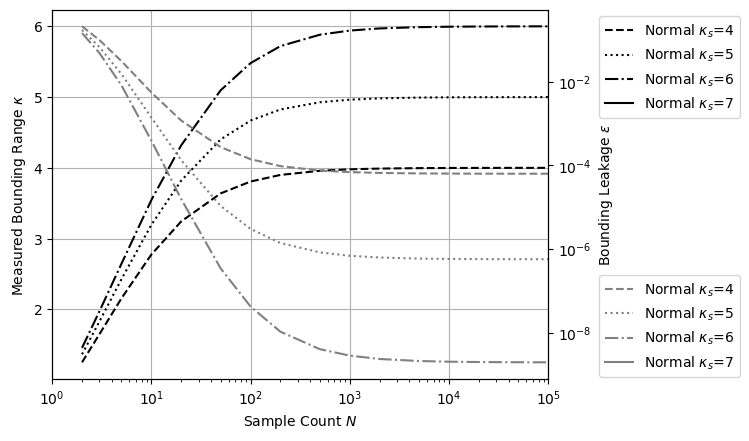

In [336]:
plotLeakage(sRange=(4,5,6,7), sLineStyle=('--',':','-.','-'))

In [201]:
dfN['Norm_Range'] = dfN['Range'] / dfN['Kappa']
dfU['Norm_Range'] = dfU['Range'] / math.sqrt(3)

In [202]:
dfN['Norm_Samples'] = (dfN['Samples'] - 1)/ dfN['Samples']

<AxesSubplot:xlabel='Samples N', ylabel='Normalized $\\kappa$'>

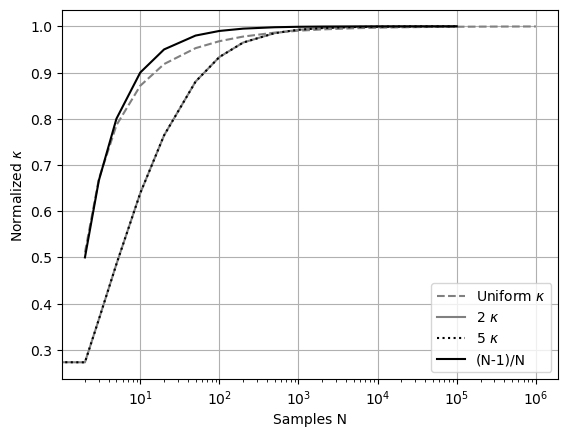

In [203]:
ax = dfU.plot(x='Samples', y = 'Norm_Range', label=f'Uniform $\kappa$', c='gray', ls='--')
for k,c,ls in zip((2,5), ('gray', 'black'), ('-', ':')):
    dfN[dfN['Kappa'] == 5].plot(ax=ax, x='Samples', y = 'Norm_Range', label=f'{k} $\kappa$', c=c, ls=ls)
dfN[dfN['Kappa'] == 5].plot(ax=ax, x='Samples', y = 'Norm_Samples', label='(N-1)/N', style='k-', 
                            logx=True, grid=True, xlabel='Samples N', ylabel='Normalized $\kappa$')

In [315]:
def plotFunc(title='Gaussian Uncertainty Distribution', 
             value:str='Variance Ratio', ylabel=r'Variance Ratio $\delta^2 f/\widehat{\delta^2} f$', 
             value2:str=None, ylabel2:str=None, logy2=False, 
             bySamples=True, xlim=None):
    fig, ax = plt.subplots()
    ax.set_title(title)
    if bySamples:
        ax.set_xscale('log')
        ax.set_xlabel('Samples N')
        if xlim:
            ax.set_xlim(*xlim)
    else:
        ax.set_xlabel(r'Bounding Range $\kappa$')
    ax.set_ylabel(ylabel)
    plt.grid(True)
    for func, style in (('x', 'k:'), ('sin(x)', 'kx'), ('exp(x)', 'k+'), ('log(x)', 'k.')):
        dfPlot = dfF[(dfF['Function'] == func) & (dfF['Samples'] > 0)]
        ax.plot(dfPlot['Samples'] if bySamples else dfPlot['Bounding'], dfPlot[value], style, label=func)
    for func, style in (('x^2', '+'), ('x^0.5', '.'), ('x^-1', ':'), ('x^-2', 'x')):
        dfPlot = dfF[(dfF['Function'] == func) & (dfF['Samples'] > 0)]
        ax.plot(dfPlot['Samples'] if bySamples else dfPlot['Bounding'], dfPlot[value], style, color='gray', label=func)
    ax.legend(bbox_to_anchor=(1.5, 0.8))
        
    if value2:
        ax2 = ax.twinx()
        ax2.set_ylabel(ylabel2)
        if logy2:
            ax2.set_yscale('log')
        ax2.plot(dfPlot['Samples'] if bySamples else dfPlot['Bounding'], dfPlot[value2], 'k-', label=ylabel2)
        ax2.legend(bbox_to_anchor=(1.5, 0.2))
 

In [316]:
dfF = pd.read_csv("../Python/Output/NormalBounding.txt", sep='\t')
dfF.head()

,Samples,Bounding,Leakage,Function,Stable Bias,Stable Variance,Output Bias,Output Variance,Bias Ratio,Variance Ratio,Adjust,Adjusted Bias,Adjusted Variance,Normalized Bias,Normalized Variance
0,0,5.000000,5.733031e-07,x,0.0,0.01,0.0,0.010000,1.0,1.000000,0.999985,0.0,0.01,1.0,1.000015
1,2,1.361352,1.734025e-01,x,0.0,0.01,0.0,0.003966,1.0,0.396596,0.396590,0.0,0.01,1.0,1.000015
2,3,1.831035,6.709535e-02,x,0.0,0.01,0.0,0.006596,1.0,0.659634,0.659624,0.0,0.01,1.0,1.000015
3,5,2.429608,1.511517e-02,x,0.0,0.01,0.0,0.008836,1.0,0.883587,0.883574,0.0,0.01,1.0,1.000015
4,7,2.816109,4.860911e-03,x,0.0,0.01,0.0,0.009525,1.0,0.952544,0.952529,0.0,0.01,1.0,1.000015


In [317]:
dfF['Function'].unique()

array(['x', 'sin(x)', 'exp(x)', 'log(x)', 'x^2', 'x^0.5', 'x^-1', 'x^-2'],
      dtype=object)

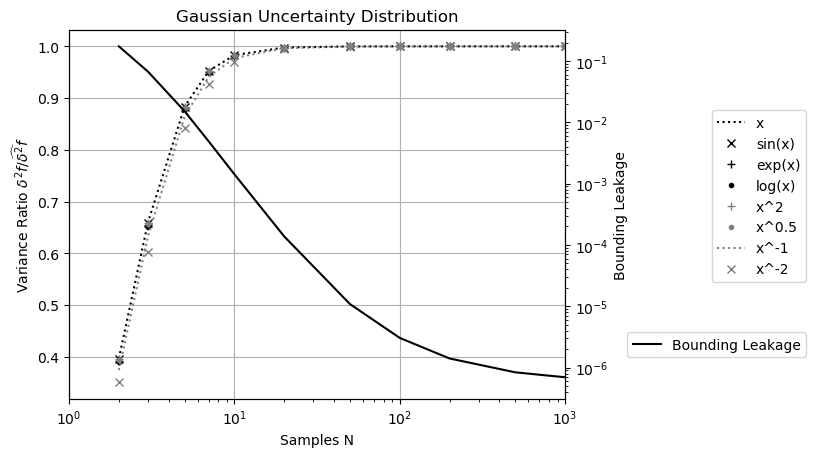

In [318]:
plotFunc(value2='Leakage', ylabel2='Bounding Leakage', logy2=True, xlim=(1,10**3))

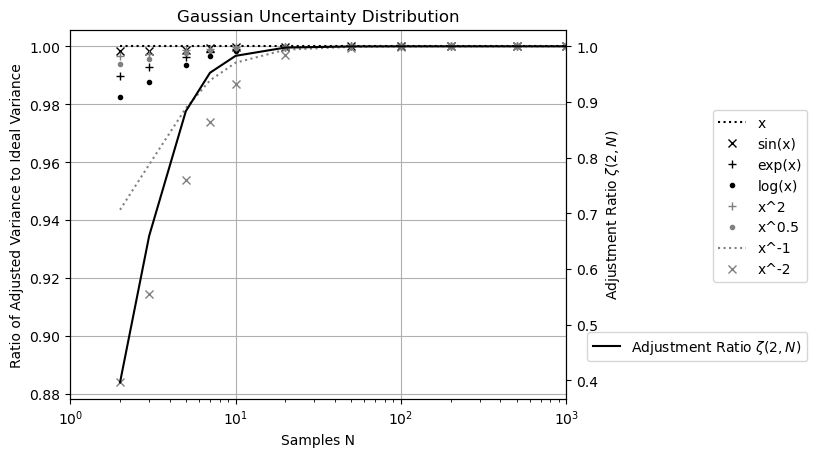

In [319]:
plotFunc(value='Normalized Variance', ylabel='Ratio of Adjusted Variance to Ideal Variance',
         value2='Adjust', ylabel2='Adjustment Ratio $\zeta(2, N)$', xlim=(1,10**3))

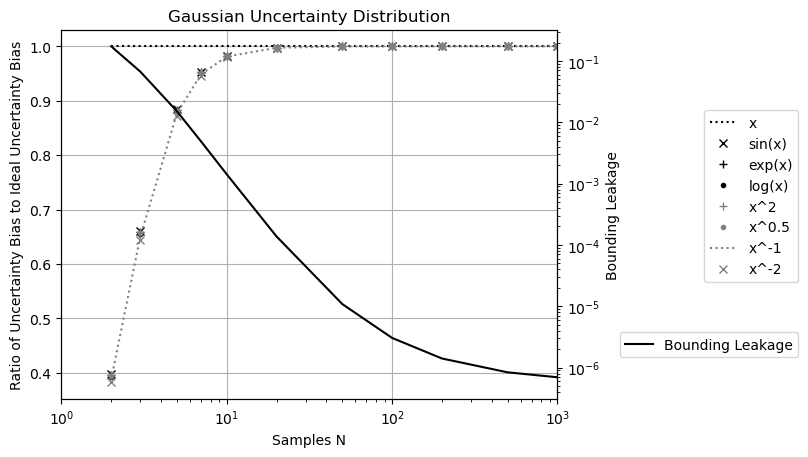

In [320]:
plotFunc(value='Bias Ratio', ylabel='Ratio of Uncertainty Bias to Ideal Uncertainty Bias',
         value2='Leakage', ylabel2='Bounding Leakage', logy2=True, xlim=(1,10**3))

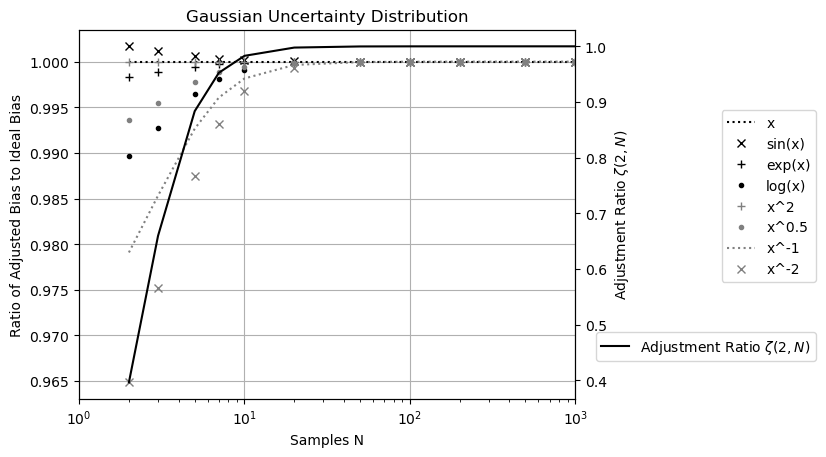

In [321]:
plotFunc(value='Normalized Bias', ylabel='Ratio of Adjusted Bias to Ideal Bias',
         value2='Adjust', ylabel2='Adjustment Ratio $\zeta(2, N)$', xlim=(1,10**3))

In [322]:
dfF = pd.read_csv("../Python/Output/UniformBounding.txt", sep='\t')
dfF.head()

,Samples,Bounding,Leakage,Function,Stable Bias,Stable Variance,Output Bias,Output Variance,Bias Ratio,Variance Ratio,Adjust,Adjusted Bias,Adjusted Variance,Normalized Bias,Normalized Variance
0,2,0.510818,0.489182,x,0.0,0.01,0.0,0.002609,1.0,0.260935,0.260935,0.0,0.01,1.0,1.0
1,3,0.669829,0.330171,x,0.0,0.01,0.0,0.004487,1.0,0.448671,0.448671,0.0,0.01,1.0,1.0
2,5,0.786016,0.213984,x,0.0,0.01,0.0,0.006178,1.0,0.617821,0.617821,0.0,0.01,1.0,1.0
3,10,0.871403,0.128597,x,0.0,0.01,0.0,0.007593,1.0,0.759343,0.759343,0.0,0.01,1.0,1.0
4,20,0.918346,0.081654,x,0.0,0.01,0.0,0.008434,1.0,0.843359,0.843359,0.0,0.01,1.0,1.0


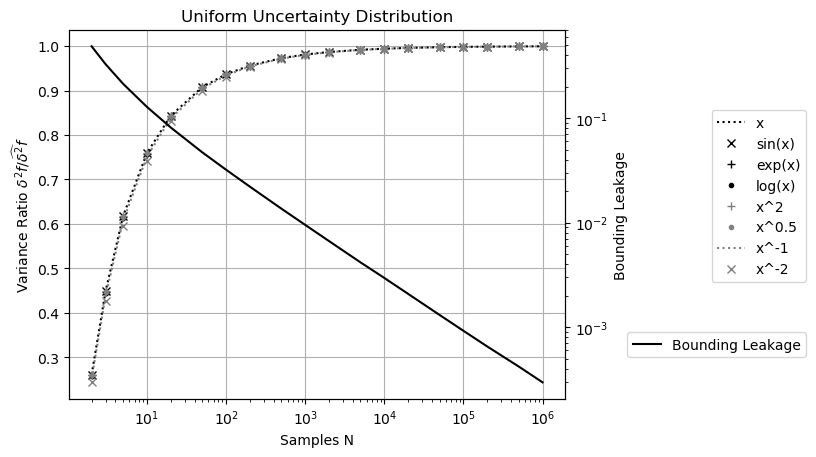

In [323]:
plotFunc(title='Uniform Uncertainty Distribution', value2='Leakage', ylabel2='Bounding Leakage', logy2=True)

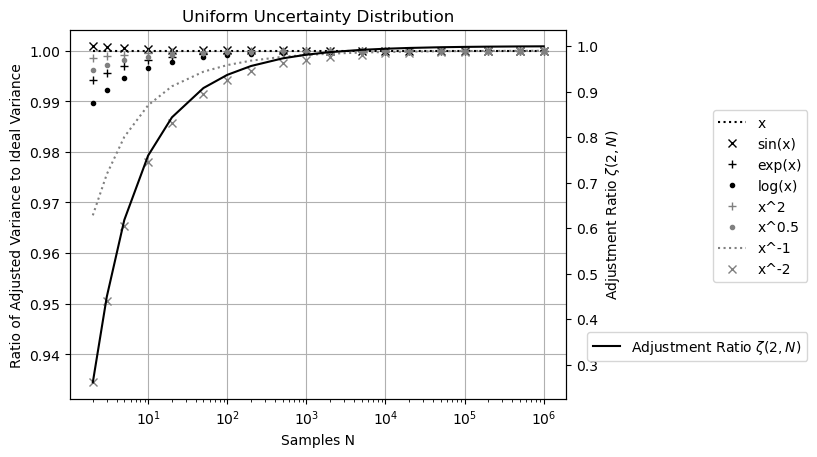

In [324]:
plotFunc(title='Uniform Uncertainty Distribution', 
         value='Normalized Variance', ylabel='Ratio of Adjusted Variance to Ideal Variance',
         value2='Adjust', ylabel2='Adjustment Ratio $\zeta(2, N)$')

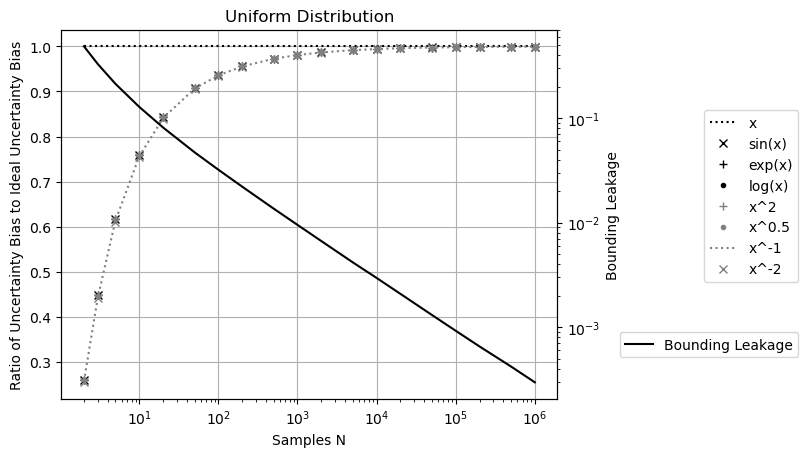

In [326]:
plotFunc(value='Bias Ratio', ylabel='Ratio of Uncertainty Bias to Ideal Uncertainty Bias',
         value2='Leakage', ylabel2='Bounding Leakage', logy2=True, title='Uniform Distribution')

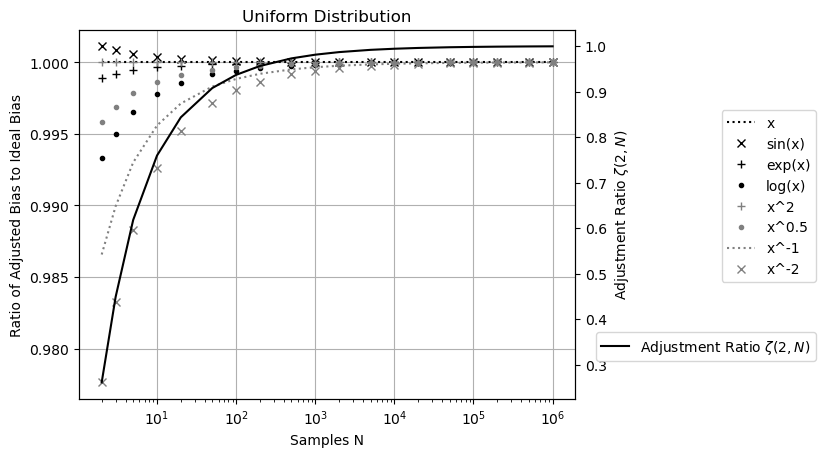

In [327]:
plotFunc(value='Normalized Bias', ylabel='Ratio of Adjusted Bias to Ideal Bias',
         value2='Adjust', ylabel2='Adjustment Ratio $\zeta(2, N)$', title='Uniform Distribution')